In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
# reading the odi csv file
odi_df = pd.read_csv('ODI.csv')
odi_df.head(10)

,Unnamed: 0,Team_1,Team_2,Winner,Margin,Ground,Match Date
0,0,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,1,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,2,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,3,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,4,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"
5,5,England,New Zealand,England,7 wickets,Swansea,"Jul 18, 1973"
6,6,England,New Zealand,no result,-,Manchester,"Jul 20, 1973"
7,7,England,West Indies,England,1 wicket,Leeds,"Sep 5, 1973"
8,8,England,West Indies,West Indies,8 wickets,The Oval,"Sep 7, 1973"
9,9,New Zealand,Australia,Australia,7 wickets,Dunedin,"Mar 30, 1974"


In [3]:
# dropping unnecessary column
odi_df.drop(columns='Unnamed: 0',inplace=True)
odi_df.head()

,Team_1,Team_2,Winner,Margin,Ground,Match Date
0,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"


In [4]:
# returning the rows and columns
odi_df.shape

(4578, 6)

In [5]:
# returning the information and metadata of the DataFrame
odi_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4578 entries, 0 to 4577
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Team_1      4578 non-null   object
 1   Team_2      4578 non-null   object
 2   Winner      4578 non-null   object
 3   Margin      4578 non-null   object
 4   Ground      4578 non-null   object
 5   Match Date  4578 non-null   object
dtypes: object(6)
memory usage: 1.7 MB


In [6]:
# description of the data
odi_df.describe()

,Team_1,Team_2,Winner,Margin,Ground,Match Date
count,4578,4578,4578,4578,4578,4578
unique,28,28,30,239,188,3903
top,Australia,West Indies,Australia,7 wickets,Sharjah,"Feb 4, 2007"
freq,619,562,594,393,244,6


In [7]:
# checking for null values
odi_df.isna().sum()

Team_1        0
Team_2        0
Winner        0
Margin        0
Ground        0
Match Date    0
dtype: int64

In [8]:
# returning the count of unique values of the columns
odi_df[['Team_1','Team_2','Ground']].nunique()

Team_1     28
Team_2     28
Ground    188
dtype: int64

Defining a function to return total matches played by the respective country.

In [9]:
# defining a function to find out total matches played by each team
def team_total_mat(team1):
    team1_mat = odi_df.loc[odi_df['Team_1'] == team1, 'Team_1'].value_counts()
    team2_mat = odi_df.loc[odi_df['Team_2'] == team1, 'Team_2'].value_counts()
    return (team1_mat + team2_mat).values[0]

In [10]:
# checking for india
team_total_mat('India')

1029

Finding Winning% of each team

In [11]:
# using list comprehension, finding each team Winning percentage
team_win_perc = [f"{each_country}: {(odi_df[odi_df['Winner'] == each_country]['Winner'].count() / team_total_mat(each_country) * 100).round(2)}"
                 for each_country in odi_df['Team_1'].unique()]
team_win_perc

['Australia: 60.74',
 'England: 50.32',
 'New Zealand: 45.9',
 'East Africa: 0.0',
 'Sri Lanka: 45.19',
 'Pakistan: 52.78',
 'India: 52.38',
 'West Indies: 48.13',
 'Canada: 24.39',
 'Bangladesh: 36.65',
 'South Africa: 61.01',
 'Zimbabwe: 26.12',
 'U.A.E.: 36.36',
 'Netherlands: 33.02',
 'Kenya: 27.27',
 'Scotland: 43.15',
 'Namibia: 47.92',
 'Hong Kong: 34.62',
 'Asia XI: 57.14',
 'Africa XI: nan',
 'Bermuda: 20.0',
 'Ireland: 39.89',
 'Afghanistan: 49.65',
 'P.N.G.: 21.21',
 'Nepal: 54.9',
 'Oman: 53.85',
 'U.S.A.: 48.89',
 'Jersey: 20.0']

In [12]:
# converting team_win_perc into DataFrane
team_win_perc = pd.DataFrame(team_win_perc)
# Using split and expand able to extend the columns in a dataframe & applied sort_values()
team_win_perc = team_win_perc[0].str.split(': ',expand=True).sort_values(by=1,ascending=False)
# dropping unnecessary column
team_win_perc.drop(19,inplace=True)
# Renaming the columns
team_win_perc.rename({0:'Country',1:'WinPercentage'},axis=1,inplace=True)
# reseting the index
team_win_perc = team_win_perc.reset_index(drop=True).head(10)
#converting the WinPercentage column into float datatype
team_win_perc['WinPercentage'] = team_win_perc['WinPercentage'].astype(float)
team_win_perc

,Country,WinPercentage
0,South Africa,61.01
1,Australia,60.74
2,Asia XI,57.14
3,Nepal,54.90
4,Oman,53.85
5,Pakistan,52.78
6,India,52.38
7,England,50.32
8,Afghanistan,49.65
9,U.S.A.,48.89


Visual for winning percentages of each team

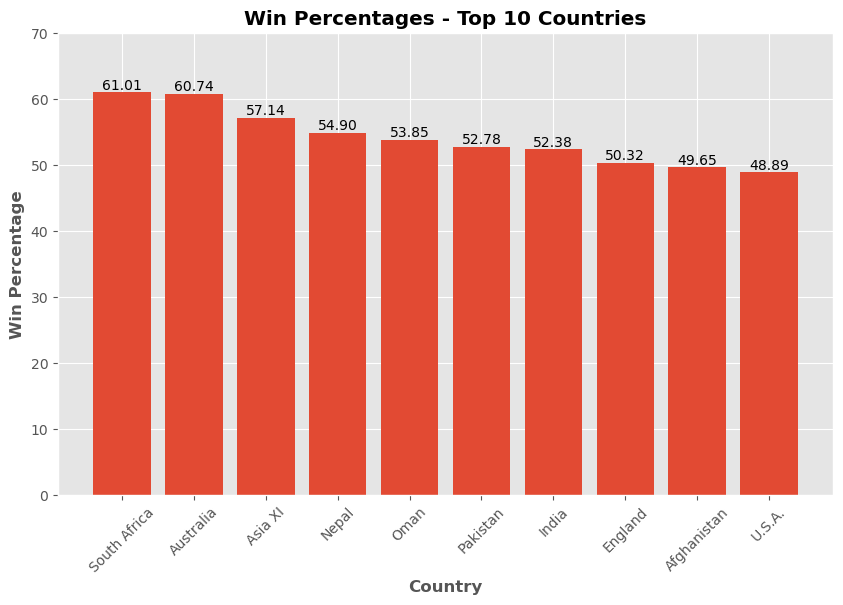

In [13]:
# using plt module visualizing the winning percentages of each team
plt.figure(figsize=(10, 6))
bars = plt.bar(team_win_perc['Country'], team_win_perc['WinPercentage'])
plt.xlabel('Country',fontweight = 'bold')
plt.ylabel('Win Percentage',fontweight = 'bold')
plt.title('Win Percentages - Top 10 Countries',fontweight = 'bold')
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.ylim(0,70)
plt.show()


In [14]:
# Inserting new column named Loser in odi_df 
odi_df.insert(3, 'Loser', odi_df.apply(lambda each_row: 'no result' if each_row['Winner'] == 'no result' 
                                       else (each_row['Team_1'] if each_row['Team_2'] == each_row['Winner'] else each_row['Team_2']), axis=1))
odi_df.head()

,Team_1,Team_2,Winner,Loser,Margin,Ground,Match Date
0,Australia,England,Australia,England,5 wickets,Melbourne,"Jan 5, 1971"
1,England,Australia,England,Australia,6 wickets,Manchester,"Aug 24, 1972"
2,England,Australia,Australia,England,5 wickets,Lord's,"Aug 26, 1972"
3,England,Australia,England,Australia,2 wickets,Birmingham,"Aug 28, 1972"
4,New Zealand,Pakistan,New Zealand,Pakistan,22 runs,Christchurch,"Feb 11, 1973"


Finding India Winning_perc v/s Losing_perc

In [15]:
# finding ind winning%
India_win_perc = ((odi_df.loc[odi_df['Winner'] == 'India','Winner'].value_counts()[0])/(team_total_mat('India')) * 100).round(2)
India_win_perc

52.38

In [16]:
# finding india losing%
India_Losing_perc = ((odi_df.loc[odi_df['Loser'] == 'India','Loser'].value_counts()[0])/(team_total_mat('India')) * 100).round(2)
India_Losing_perc

42.86

Visual for most matches played by India against each team

In [17]:
# Creating a new DataFrame containing matches where India is one of the teams
india_matches_df = odi_df[(odi_df['Team_1'] == 'India') | (odi_df['Team_2'] == 'India')]

In [18]:
# Calculating the count of matches played by India against each team
matches_count = india_matches_df['Team_1'].value_counts().add(india_matches_df['Team_2'].value_counts(), fill_value=0).reset_index()

# Renaming the columns
matches_count = matches_count.rename(columns={'index': 'Opponent', 0: 'MatchesPlayed'})

# Removing "India" from the output
matches_count = pd.DataFrame(matches_count[matches_count['Opponent'] != 'India'].sort_values(by='MatchesPlayed'
                                                                                             ,ascending=False).head(10))
matches_count['MatchesPlayed'] = matches_count['MatchesPlayed'].astype(int)
# Displaying the count of matches played by India against each team
matches_count

,Opponent,MatchesPlayed
16,Sri Lanka,165
1,Australia,146
18,West Indies,139
13,Pakistan,132
12,New Zealand,116
5,England,106
15,South Africa,90
19,Zimbabwe,66
2,Bangladesh,39
9,Kenya,13


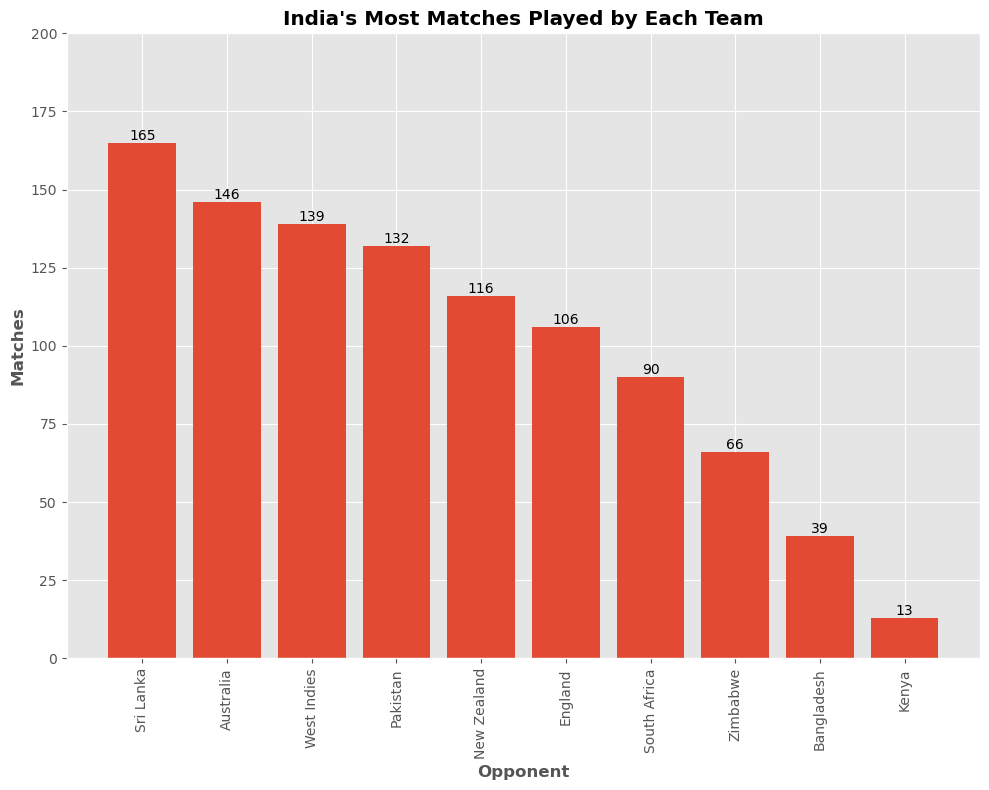

In [19]:
# Displaying the Total matches played by India against each team
plt.figure(figsize=(10, 8))
plt.bar(matches_count['Opponent'], matches_count['MatchesPlayed'])
plt.xlabel('Opponent',fontweight = 'bold')
plt.ylabel('Matches',fontweight = 'bold')
plt.title('India\'s Most Matches Played by Each Team',fontweight = 'bold')
plt.xticks(rotation=90)

# Adding values on top of each bar
for i, value in enumerate(matches_count['MatchesPlayed']):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.ylim(0, 200)
plt.tight_layout()
plt.show()


Visual for India's most wins against each team

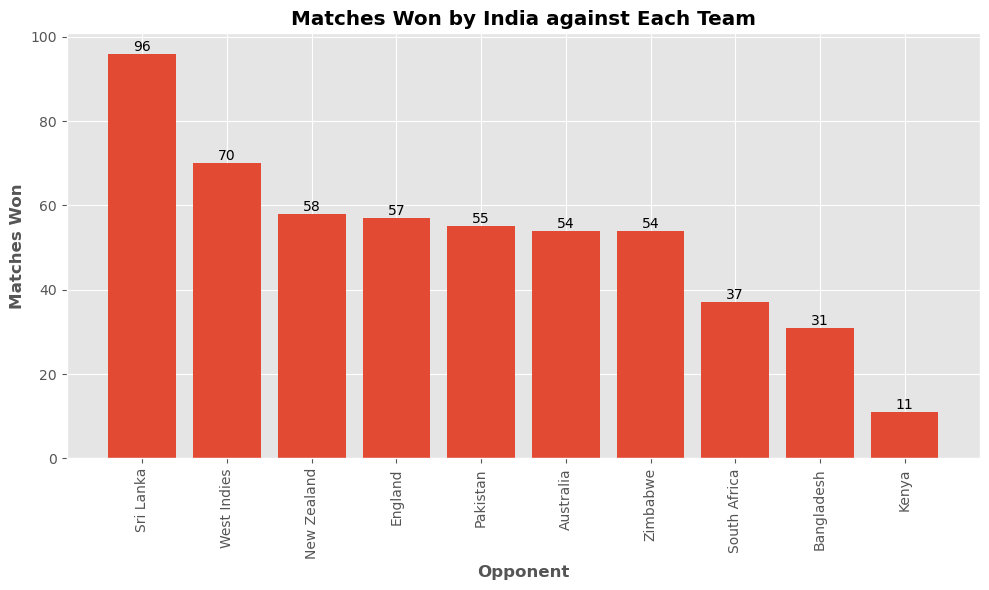

In [20]:
# Filtering matches where India is the winner
india_wins_df = india_matches_df[india_matches_df['Winner'] == 'India']

# Count the matches won by India against each team
matches_won = india_wins_df['Loser'].value_counts().reset_index()

# Renaming the columns
matches_won = matches_won.rename(columns={'index': 'Opponent', 'Loser': 'MatchesWon'})

# Sorting the DataFrame based on MatchesWon column
matches_won = matches_won.sort_values('MatchesWon', ascending=False).reset_index(drop=True).head(10)

# Displaying the count of matches won by India against each team
plt.figure(figsize=(10, 6))
plt.bar(matches_won['Opponent'], matches_won['MatchesWon'])
plt.xlabel('Opponent',fontweight = 'bold')
plt.ylabel('Matches Won',fontweight = 'bold')
plt.title('Matches Won by India against Each Team',fontweight = 'bold')
plt.xticks(rotation=90)

# Addding values on top of each bar
for i, value in enumerate(matches_won['MatchesWon']):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Visual for India's Most Losses by each team

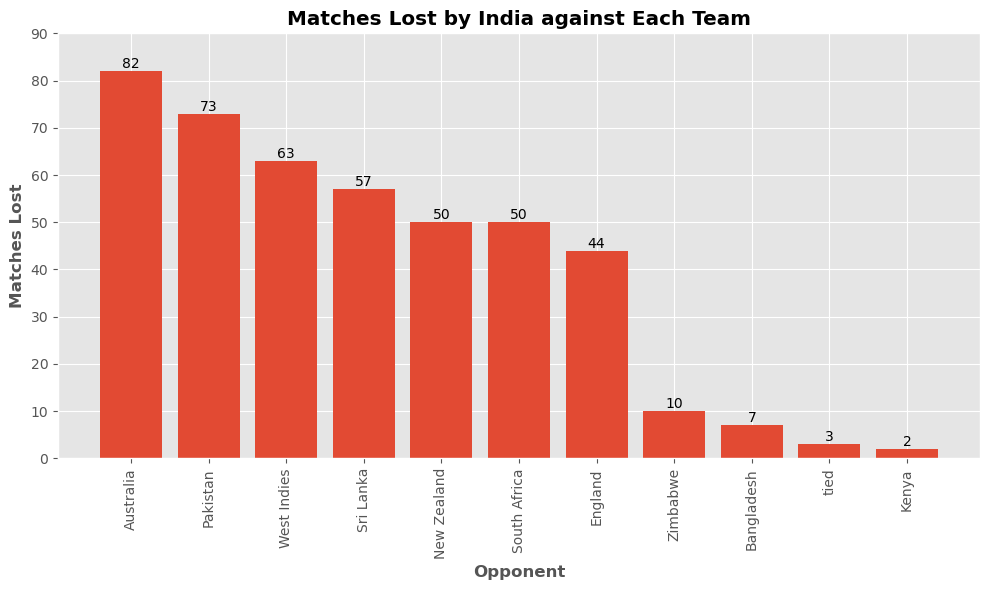

In [21]:
# Filtering matches where India lost
india_losses_df = india_matches_df[india_matches_df['Loser'] == 'India']

# Count the matches lost by India against each team
matches_lost = india_losses_df['Winner'].value_counts().reset_index()

# Renaming the columns
matches_lost = matches_lost.rename(columns={'index': 'Opponent', 'Winner': 'MatchesLost'})

# Sorting the DataFrame based on MatchesLost column
matches_lost = matches_lost.sort_values('MatchesLost', ascending=False).reset_index(drop=True)

# Displaying the count of matches lost by India against each team
plt.figure(figsize=(10, 6))
plt.bar(matches_lost['Opponent'], matches_lost['MatchesLost'])
plt.xlabel('Opponent',fontweight = 'bold')
plt.ylabel('Matches Lost',fontweight = 'bold')
plt.title('Matches Lost by India against Each Team',fontweight = 'bold')
plt.xticks(rotation=90)

# Addding values on top of each bar
for i, value in enumerate(matches_lost['MatchesLost']):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.ylim(0,90)
plt.tight_layout()
plt.show()


In [22]:
# adding the year column to the data using Match date column
odi_df['Year'] = odi_df['Match Date'].apply(lambda x: x[x.find(',') + 2:]).astype(int)
odi_df.head()

,Team_1,Team_2,Winner,Loser,Margin,Ground,Match Date,Year
0,Australia,England,Australia,England,5 wickets,Melbourne,"Jan 5, 1971",1971
1,England,Australia,England,Australia,6 wickets,Manchester,"Aug 24, 1972",1972
2,England,Australia,Australia,England,5 wickets,Lord's,"Aug 26, 1972",1972
3,England,Australia,England,Australia,2 wickets,Birmingham,"Aug 28, 1972",1972
4,New Zealand,Pakistan,New Zealand,Pakistan,22 runs,Christchurch,"Feb 11, 1973",1973


Finding India total matches played each year after 2012

In [23]:
india_mat_aft_2012 = odi_df[(odi_df['Year'] > 2012) & ((odi_df['Team_1'] == 'India') | (odi_df['Team_2'] == 'India'))
                            ].groupby('Year')[['Winner']].count().rename(columns={'Winner':'Total_Matches'})
india_mat_aft_2012

,Total_Matches
Year,
2013,34
2014,24
2015,23
2016,13
2017,29
2018,20
2019,28
2020,9
2021,6


Finding India wins each year after 2012

In [24]:
india_wins_aft_2012 = odi_df[(odi_df['Year'] > 2012) & (odi_df['Winner'] == 'India'
                                                        )].groupby('Year')[['Winner']].count().rename(columns={'Winner':'Wins_count'})
india_wins_aft_2012

,Wins_count
Year,
2013,22
2014,14
2015,13
2016,7
2017,21
2018,14
2019,19
2020,3
2021,4


Visualization for India Total Matches v/s Matches Won by Year after 2012

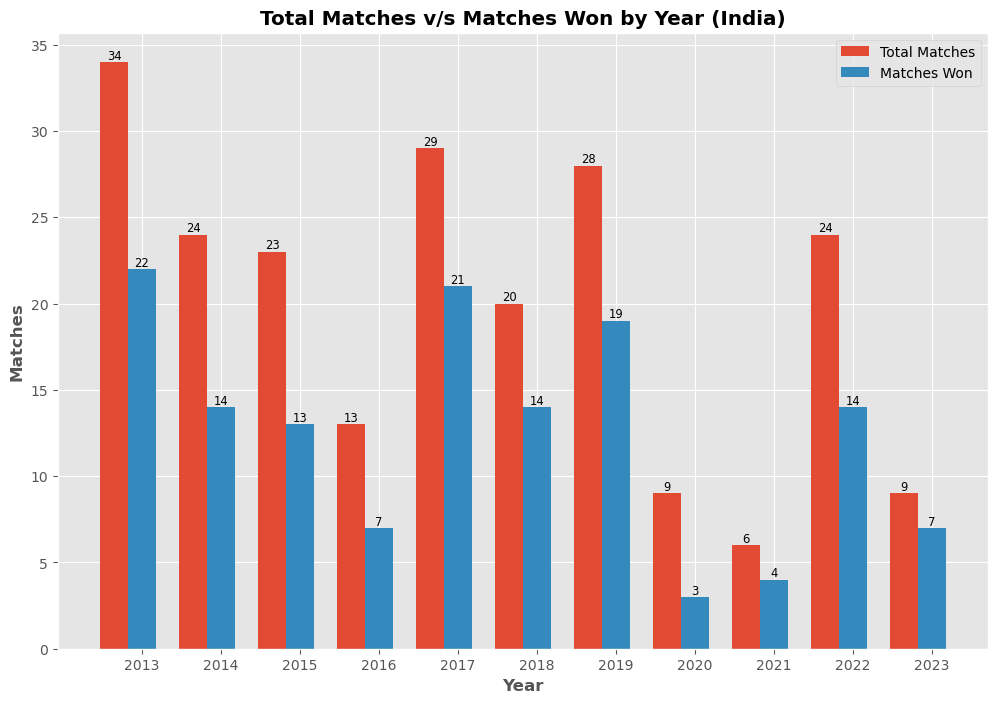

In [25]:
# Combining the two DataFrames
combined_df = pd.concat([india_mat_aft_2012, india_wins_aft_2012], axis=1)
combined_df.columns = ['TotalMatches', 'Wins_count']

# Extracting the relevant data for plotting
years = combined_df.index
total_matches = combined_df['TotalMatches']
wins_count = combined_df['Wins_count']

# Setting the width of each bar
bar_width = 0.35

# Setting the positions of the bars on the x-axis
index = years

# Plotting the bars
plt.figure(figsize=(12, 8))
plt.bar(index, total_matches, bar_width, label='Total Matches')
plt.bar(index + bar_width, wins_count, bar_width, label='Matches Won')

# Addding labels, title, and legend
plt.xlabel('Year',fontweight = 'bold')
plt.ylabel('Matches',fontweight = 'bold')
plt.title('Total Matches v/s Matches Won by Year (India)',fontweight = 'bold')
plt.xticks(index + bar_width, years)
plt.legend()

# Annotate the bars with count values
for i, j in zip(index, total_matches):
    plt.text(i, j, str(j), ha='center', va='bottom', fontsize='small')

for i, j in zip(index + bar_width, wins_count):
    plt.text(i, j, str(j), ha='center', va='bottom', fontsize='small')

# Displaying the plot
plt.show()


Finding Top 10 Grounds by Count of Matches

In [26]:
grounds_count = pd.DataFrame(odi_df[['Ground']].value_counts().sort_values(ascending=False)).rename(columns={0:'Count'}).head(10)
grounds_count

,Count
Ground,
Sharjah,244
Harare,174
Sydney,160
Melbourne,150
Colombo (RPS),138
Mirpur,117
Adelaide,86
Bulawayo,84
Perth,82


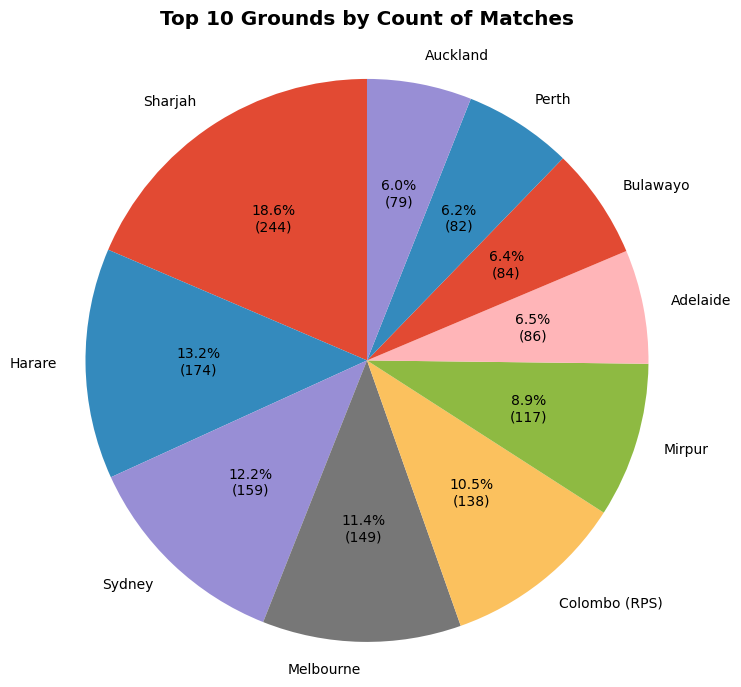

In [27]:
# Set up the data
labels = grounds_count.index.get_level_values(0).tolist()
sizes = grounds_count['Count'].tolist()

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=[8,8])

# Create the pie chart
ax.pie(sizes, labels=labels, autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*sum(sizes))})', startangle=90)

# Add a title with a gap
ax.set_title('Top 10 Grounds by Count of Matches', pad=20,fontweight = 'bold')

# Display the chart
ax.axis('equal')
plt.show()